In [160]:
import csv
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

def get_url(search):
    search = search.replace(' ', '+')
    url = "https://github.com/search?q={}"
    url = url.format(search)
    url += "&p={}"
    return url

def list_to_string(list):
    str1=''
    for object in list:
        str1 += object
    return str1

def value_to_float(x):
    return float(x.replace('k', '')) * 1000

def extract_data(item):
    result = item.find('a', class_='v-align-middle')
    repo_name = result.text
    try:
        description = item.find('p', class_='mb-1').text.strip()
    except AttributeError:
        description = ''
        
    topics = item.find_all(class_='topic-tag')
    list = []
    for topic in topics:
        x = topic.text.replace('\n', '')
        list.append(x)
    
    try:
        stars = value_to_float(item.find('a', class_='Link--muted').text.strip())
    except AttributeError:
        stars = ''
    
    try:
        main_language = item.find('span', {'itemprop': 'programmingLanguage'}).text
    except AttributeError:
        main_language = ''
    
    last_updated = item.find('relative-time', class_='no-wrap').text
    try:
        open_issues = item.find('a', class_='Link--muted f6').text.strip()
    except AttributeError:
        open_issues = ''
    link = "https://github.com" + result.get('href')
    
    result = (repo_name, description, list, stars, main_language, last_updated, open_issues, link)
    return result

def top_10_results():
    df = pd.read_csv('github.csv', usecols=['Stars', "Repository Link"])
    df = df.sort_values(by = 'Stars')
    print(df.loc[::-1].head(10))

def graph():
    plt.style.use('bmh')
    df = pd.read_csv('github.csv')
    
    x = df['Repository Name'].head(5)
    y = df['Stars'].head(5)
    
    plt.figure(figsize=(100,40))
    plt.title('Popularity of various repositories', fontsize=40)
    plt.xlabel('Repository Name', fontsize=100)
    plt.ylabel('Stars', fontsize=100)
    plt.bar(x, y)
    
    plt.show()

def main(term):
    records = []
    for page in range(1, 6):
        url = get_url(term).format(page)

        res = requests.get(url)
        htmlContent = res.content
        soup = BeautifulSoup(htmlContent, 'html.parser')

        results = soup.find_all('li', class_="repo-list-item")
        print(len(results))
        for item in results:
            record = extract_data(item)
            if record:
                records.append(record)
    with open('github.csv', 'w', newline = '', encoding = 'utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Repository Name', 'Description', 'Topic Tags', 'Stars', 'Main Language', 'Last Updated', 'Open Issues', 'Repository Link'])
        writer.writerows(records)
        
    graph()
    print('Top 10 search results by stars are ')
    top_10_results()

10
10
10
10
10


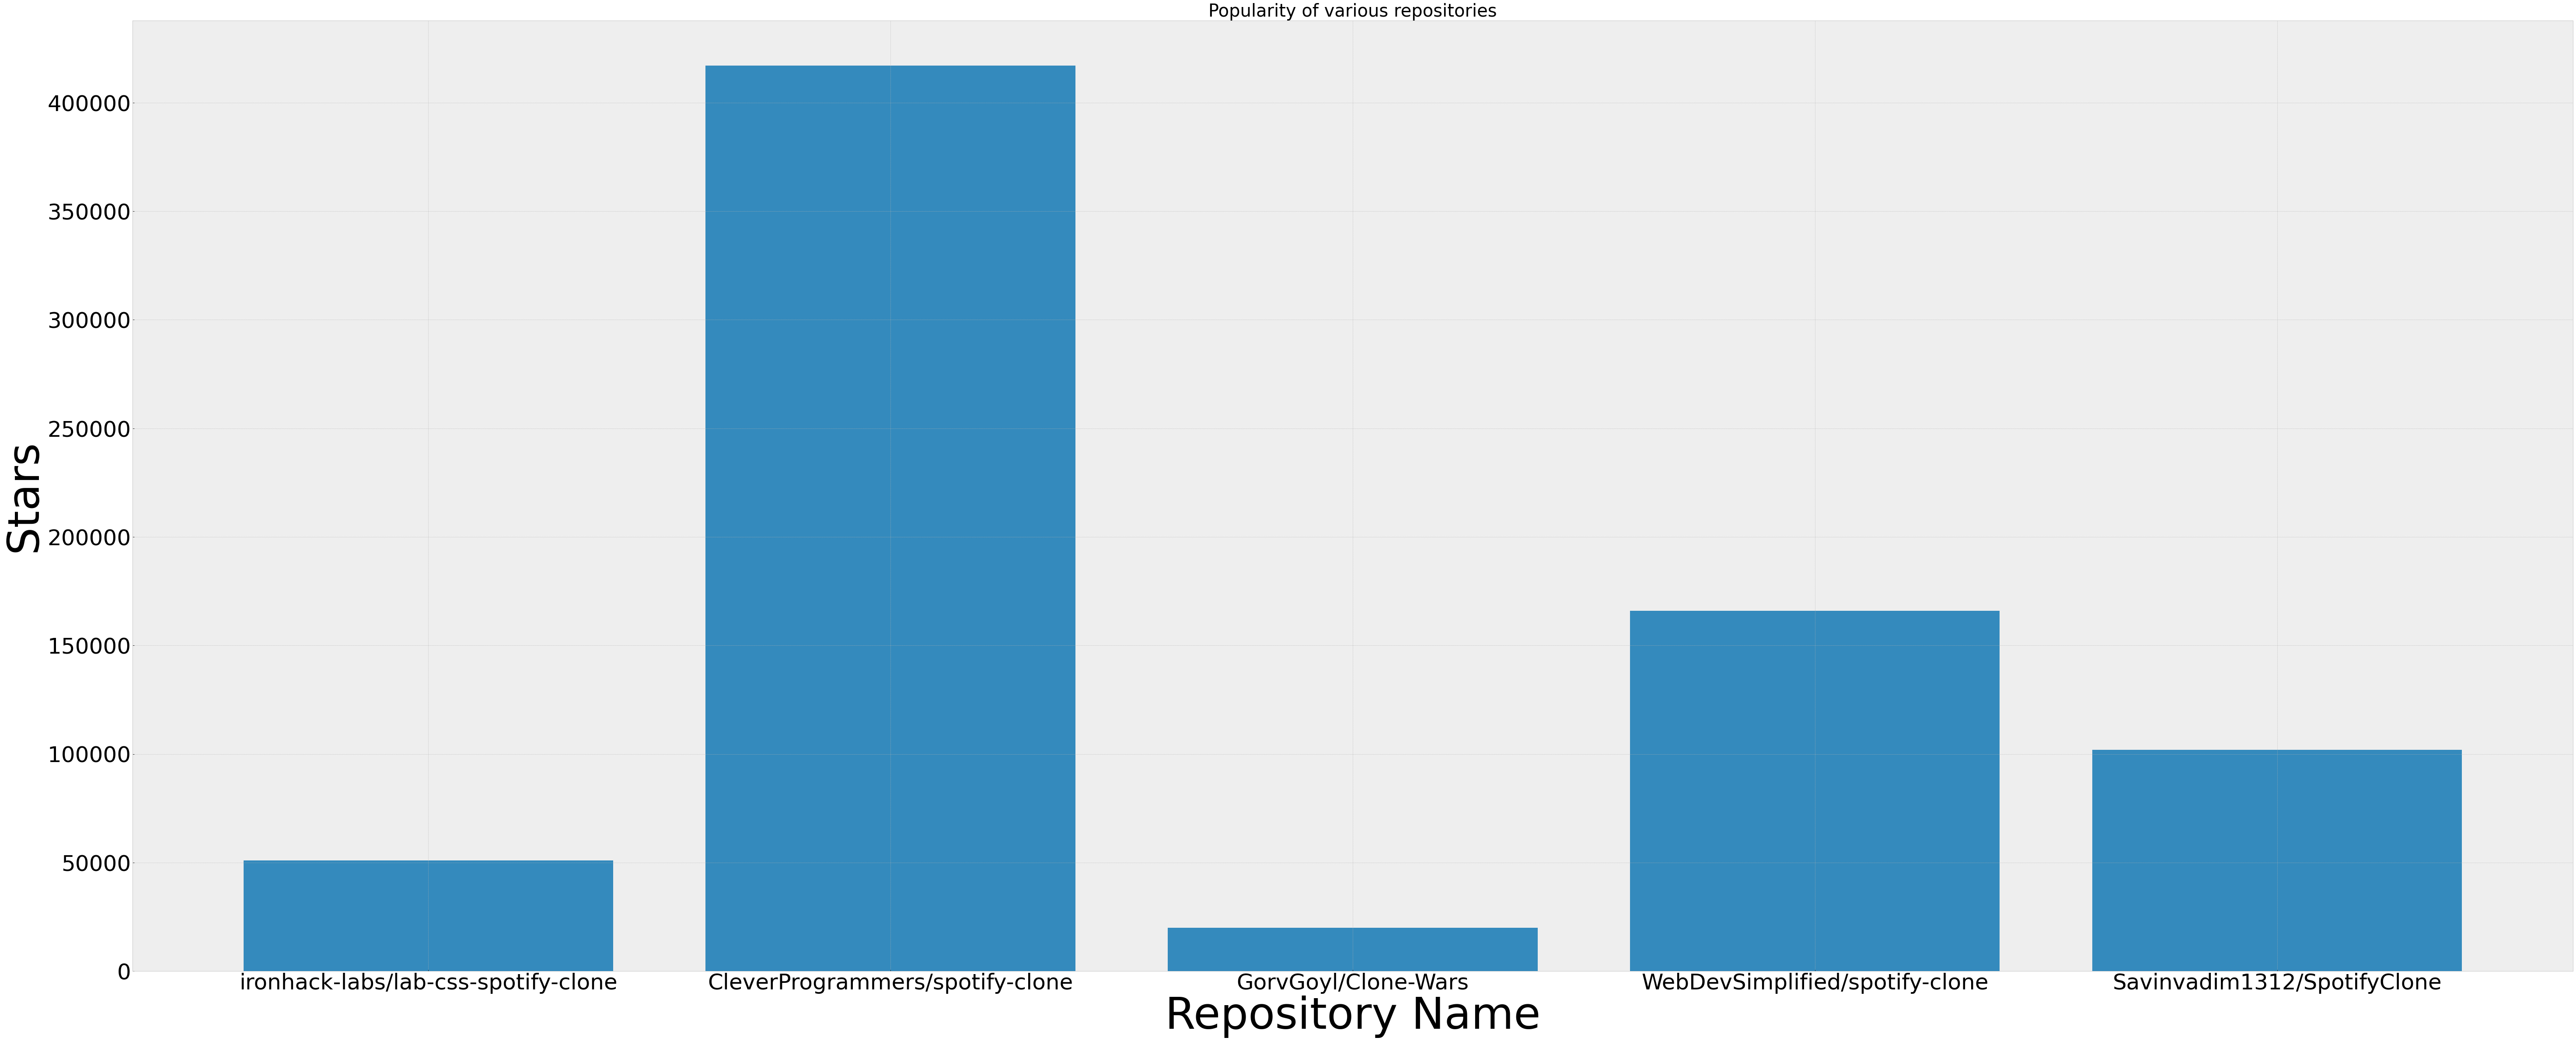

Top 10 search results by stars are 
       Stars                                    Repository Link
1   417000.0  https://github.com/CleverProgrammers/spotify-c...
6   412000.0         https://github.com/calebnance/expo-spotify
8   231000.0      https://github.com/JL978/spotify-clone-client
16  221000.0     https://github.com/Koducation/AndroidCourse101
12  207000.0  https://github.com/tayfunerbilen/react-tailwin...
9   179000.0  https://github.com/sigma67/spotifyplaylist_to_...
3   166000.0  https://github.com/WebDevSimplified/spotify-clone
17  152000.0        https://github.com/oguz3/spotify-web-player
7   115000.0       https://github.com/mitchtabian/Spotify-Clone
4   102000.0     https://github.com/Savinvadim1312/SpotifyClone


In [161]:
main('Spotify Clone')